### Compare Algorithms and Plot them


## Plot the data
--> make_classification,make_moon,make_circles

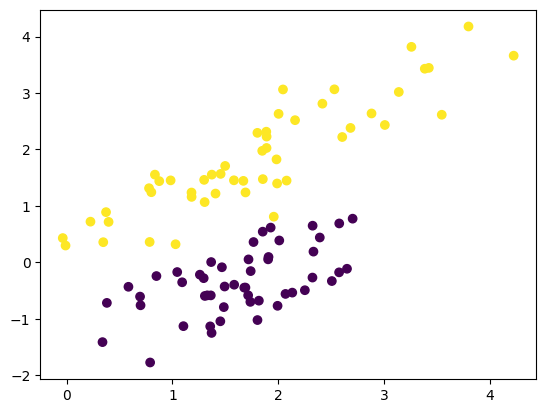

In [15]:
from sklearn.datasets import make_classification , make_moons , make_circles
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_features=2 , n_redundant=0 , n_informative=2, n_clusters_per_class=1 , random_state=42)
X+= 1.3 * np.random.uniform(size = X.shape) ## ADD noise

Xy = (X,y)
plt.scatter(X[:,0], X[:,1], c = y)



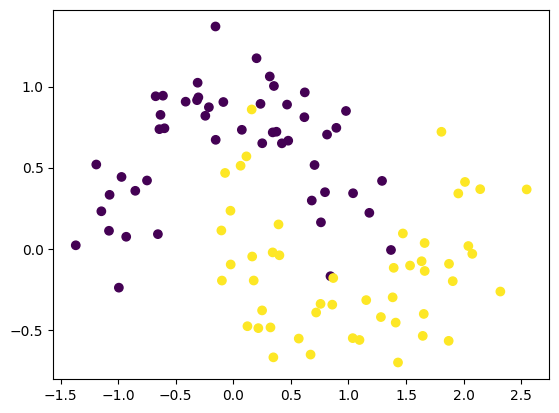

In [16]:
X,y = make_moons(noise = 0.2, random_state = 42)
plt.scatter(X[:,0], X[:,1], c=y)

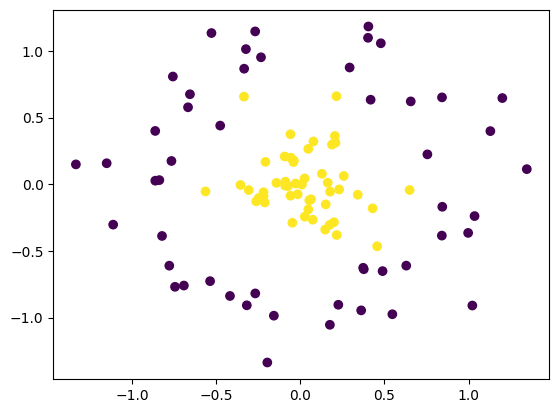

In [17]:
X,y = make_circles(noise = 0.2, factor= 0.1, random_state=42)
plt.scatter(X[:,0], X[:,1],c=y)

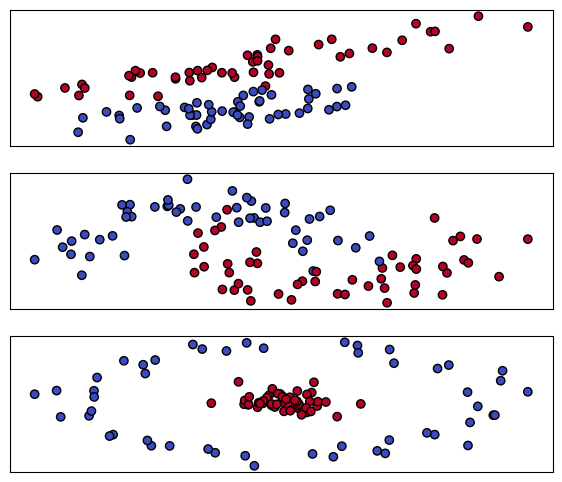

In [18]:
datasets = [Xy,
            make_moons(noise = 0.2,random_state=42),
            make_circles(noise= 0.1, factor = 0.1,random_state=42)]

plt.figure(figsize=(7,6))
i = 1
for dataset_count,ds in enumerate(datasets):
  X,y = ds
  ax = plt.subplot(len(datasets), 1 , i)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.scatter(X[:,0], X[:,1],c=y, cmap = plt.cm.coolwarm , edgecolors= "black")
  i+=1

plt.show()



## FULL


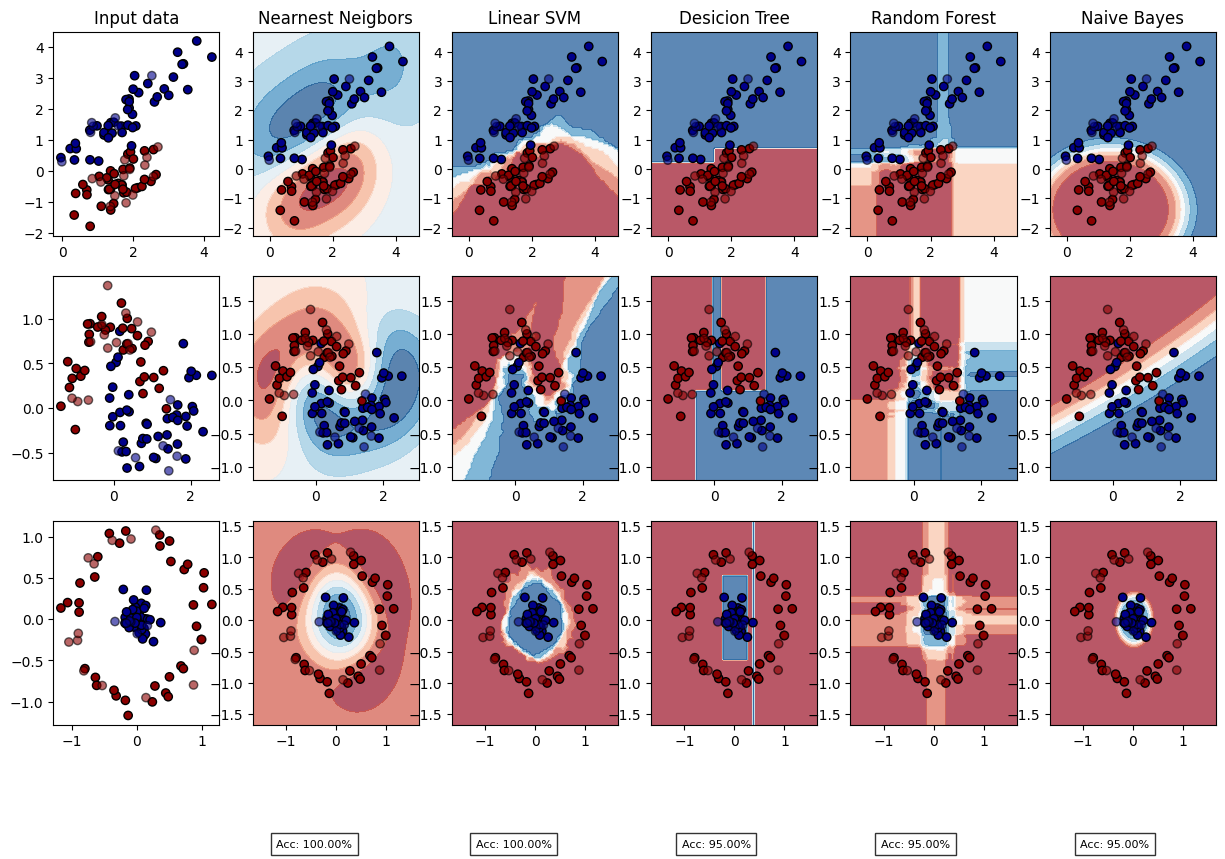

In [20]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.inspection import DecisionBoundaryDisplay

names = ["Nearnest Neigbors" , "Linear SVM","Desicion Tree", "Random Forest","Naive Bayes"]
classifiers = [SVC(),
                  KNeighborsClassifier(),
                  DecisionTreeClassifier(),
                  RandomForestClassifier(),
                  GaussianNB()]

fig = plt.figure(figsize=(15, 9))
i = 1
total_subplots = len(datasets) * (len(classifiers) + 1)  # max subplot

for dataset_count, ds in enumerate(datasets):
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    ## Plot TRAIN
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if dataset_count == 0:
        ax.set_title("Input data")
    cm_bright = ListedColormap(["darkred", "darkblue"])
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="black")
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="black", alpha=0.6)
    i += 1

    for name, clf in zip(names, classifiers):
        if i > total_subplots:
            break  ## If we reach max subplot value.Break the loops

        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)


        DecisionBoundaryDisplay.from_estimator(clf, X, cmap=plt.cm.RdBu, alpha=0.7, ax=ax, eps=0.5)

        # Plot train again
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="black")
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="black", alpha=0.6)

        ## Write the Accuracy
        score = clf.score(X_test, y_test)
        ax.text(
            0.6, -0.6, f"Acc: {score:.2%}", transform=ax.transAxes,
            horizontalalignment="right", fontsize=8, bbox=dict(facecolor="white", alpha=0.8)
        )

        if dataset_count == 0:
            ax.set_title(name)

        i += 1

plt.show()
